# Cyclistic Bike-Share Analysis - Phase 5: VISUALIZATIONS

## Creating Data Visualizations

**My Objective:** Create professional visualizations to communicate my key findings about member vs casual rider behavior.

**Visualizations I will create:**
1. Member vs Casual distribution
2. Ride duration comparison
3. Hourly usage patterns
4. Daily usage patterns
5. Monthly trends
6. Weekday vs Weekend comparison
7. Bike type preferences

---

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Turn off warning messages
warnings.filterwarnings('ignore')

# Set style for professional-looking charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load the cleaned data
df = pd.read_csv('../data/processed/cleaned_2024_data.csv')

# Convert datetime columns
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

# Create helper columns for better visualization labels

# Map day numbers to day names
day_names = {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
}
df['day_name'] = df['day_of_week'].map(day_names)

# Map month numbers to month names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
df['month_name'] = df['month'].map(month_names)

# Create weekday/weekend classification
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Confirm data is ready
print("Data loaded and prepared for visualization")
print(f"Total records: {len(df):,}")

Data loaded and prepared for visualization
Total records: 4,859,019


---

## Visualization 1: Member Type Distribution

I'll create a chart showing the overall split between casual riders and annual members.

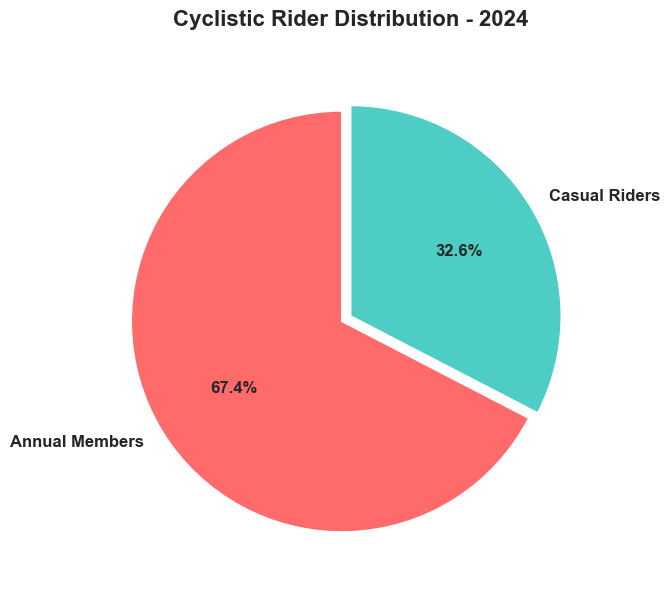

Chart saved: 01_member_distribution.png


In [ ]:
# Member type distribution pie chart
fig, ax = plt.subplots(figsize=(10, 6))

member_counts = df['member_casual'].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
explode = (0.05, 0)

ax.pie(member_counts, labels=['Annual Members', 'Casual Riders'], 
       autopct='%1.1f%%', startangle=90, colors=colors, explode=explode,
       textprops={'fontsize': 12, 'weight': 'bold'})

ax.set_title('Cyclistic Rider Distribution - 2024', fontsize=16, weight='bold', pad=20)

plt.tight_layout()
plt.savefig('../visualizations/01_member_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: 01_member_distribution.png")

---

## Visualization 2: Ride Duration Comparison

I'll compare the average ride duration between casual riders and annual members.

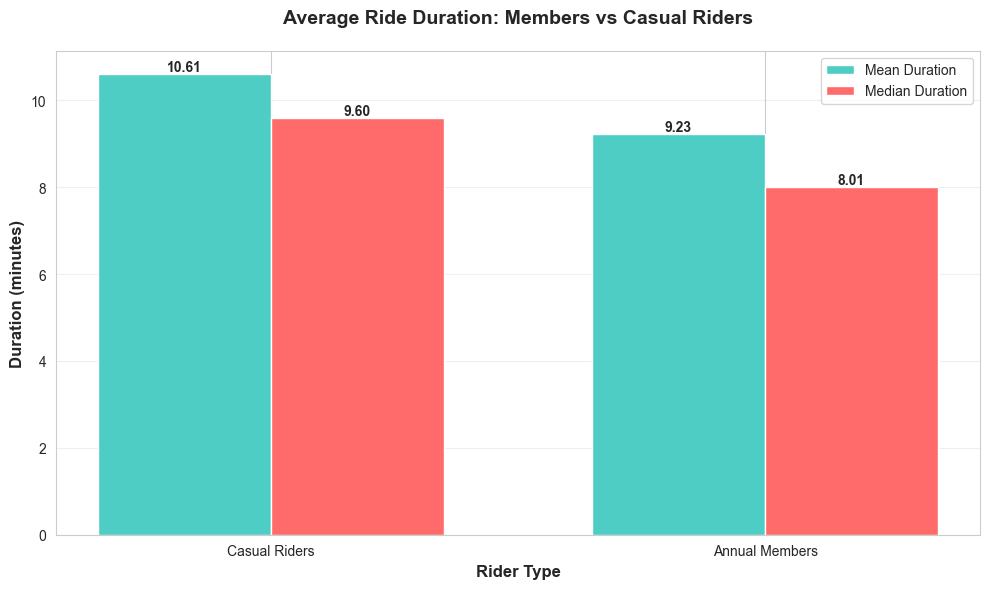

Chart saved: 02_duration_comparison.png


In [ ]:
# Ride duration comparison bar chart
fig, ax = plt.subplots(figsize=(10, 6))

duration_stats = df.groupby('member_casual')['ride_length'].agg(['mean', 'median']).round(2)

x = np.arange(2)
width = 0.35

bars1 = ax.bar(x - width/2, duration_stats['mean'], width, label='Mean Duration', color='#4ECDC4')
bars2 = ax.bar(x + width/2, duration_stats['median'], width, label='Median Duration', color='#FF6B6B')

ax.set_xlabel('Rider Type', fontsize=12, weight='bold')
ax.set_ylabel('Duration (minutes)', fontsize=12, weight='bold')
ax.set_title('Average Ride Duration: Members vs Casual Riders', fontsize=14, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(['Casual Riders', 'Annual Members'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.savefig('../visualizations/02_duration_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: 02_duration_comparison.png")

---

## Visualization 3: Hourly Usage Patterns

I'll create a line chart showing when each group uses bikes throughout the day.

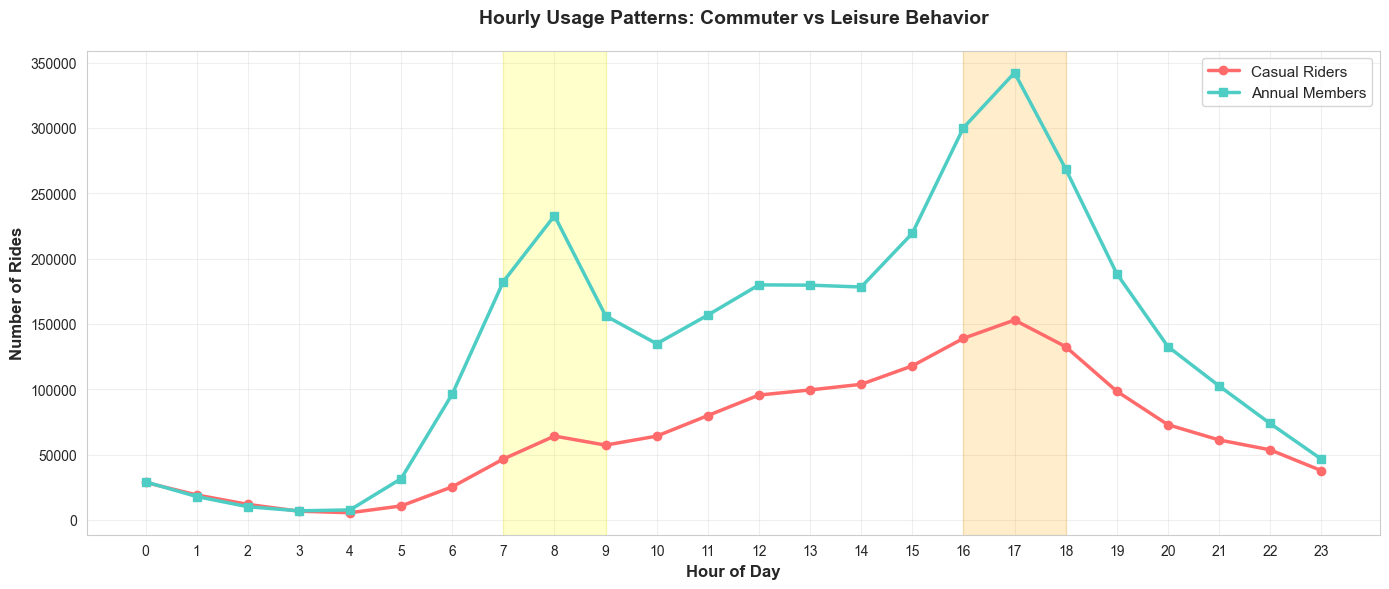

Chart saved: 03_hourly_patterns.png


In [ ]:
# Hourly usage pattern line chart
fig, ax = plt.subplots(figsize=(14, 6))

hourly_data = df.groupby(['hour', 'member_casual']).size().unstack()

ax.plot(hourly_data.index, hourly_data['casual'], marker='o', linewidth=2.5, 
        label='Casual Riders', color='#FF6B6B', markersize=6)
ax.plot(hourly_data.index, hourly_data['member'], marker='s', linewidth=2.5, 
        label='Annual Members', color='#4ECDC4', markersize=6)

ax.set_xlabel('Hour of Day', fontsize=12, weight='bold')
ax.set_ylabel('Number of Rides', fontsize=12, weight='bold')
ax.set_title('Hourly Usage Patterns: Commuter vs Leisure Behavior', fontsize=14, weight='bold', pad=20)
ax.set_xticks(range(0, 24))
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Add shaded regions for commute hours
ax.axvspan(7, 9, alpha=0.2, color='yellow', label='Morning Commute')
ax.axvspan(16, 18, alpha=0.2, color='orange', label='Evening Commute')

plt.tight_layout()
plt.savefig('../visualizations/03_hourly_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: 03_hourly_patterns.png")

---

## Visualization 4: Daily Usage Patterns

I'll show how usage varies by day of the week for each group.

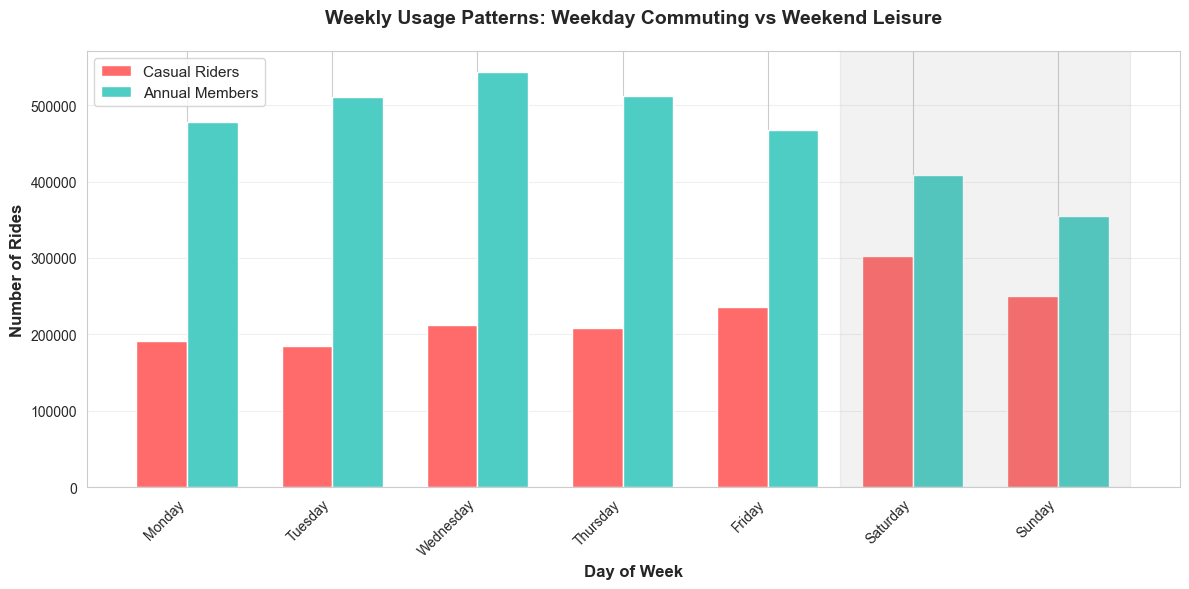

Chart saved: 04_daily_patterns.png


In [ ]:
# Daily usage pattern grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_data = df.groupby(['day_name', 'member_casual']).size().unstack()
daily_data = daily_data.reindex(day_order)

x = np.arange(len(day_order))
width = 0.35

bars1 = ax.bar(x - width/2, daily_data['casual'], width, label='Casual Riders', color='#FF6B6B')
bars2 = ax.bar(x + width/2, daily_data['member'], width, label='Annual Members', color='#4ECDC4')

ax.set_xlabel('Day of Week', fontsize=12, weight='bold')
ax.set_ylabel('Number of Rides', fontsize=12, weight='bold')
ax.set_title('Weekly Usage Patterns: Weekday Commuting vs Weekend Leisure', fontsize=14, weight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(day_order, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# Highlight weekends
ax.axvspan(4.5, 6.5, alpha=0.1, color='gray', label='Weekend')

plt.tight_layout()
plt.savefig('../visualizations/04_daily_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: 04_daily_patterns.png")

---

## Visualization 5: Monthly Trends

I'll visualize how bike usage changes throughout the year for both groups.

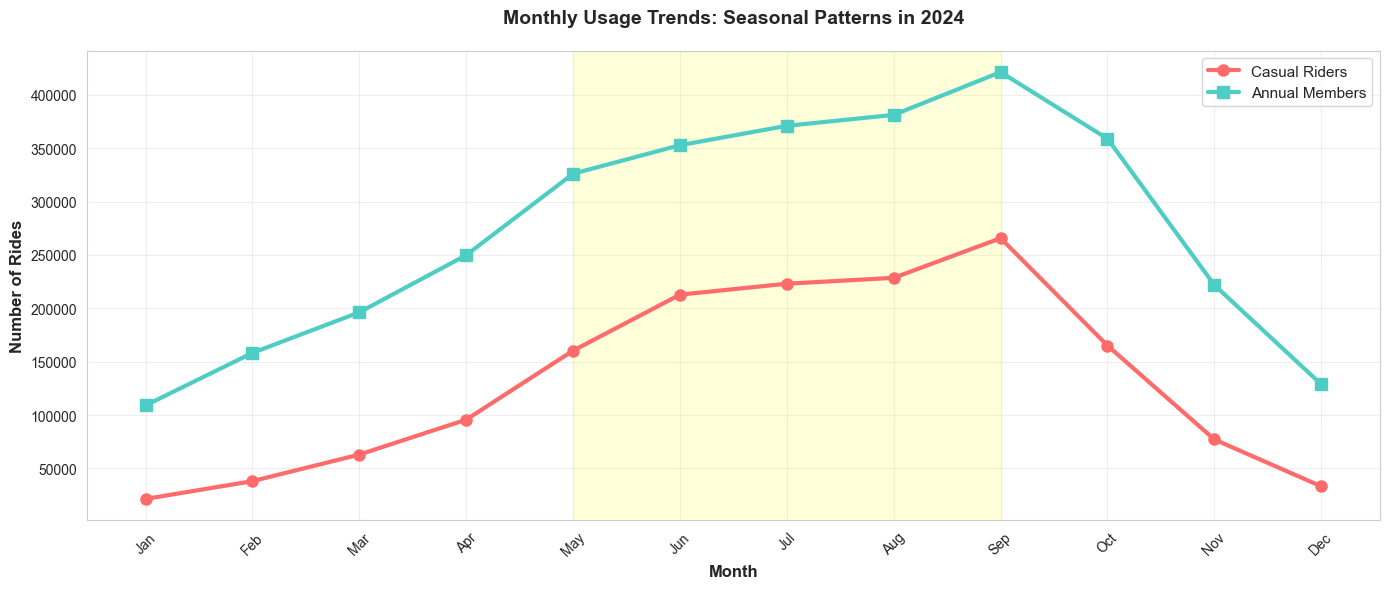

Chart saved: 05_monthly_trends.png


In [ ]:
# Monthly trends line chart
fig, ax = plt.subplots(figsize=(14, 6))

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data = df.groupby(['month_name', 'member_casual']).size().unstack()
monthly_data = monthly_data.reindex(month_order)

ax.plot(month_order, monthly_data['casual'], marker='o', linewidth=3, 
        label='Casual Riders', color='#FF6B6B', markersize=8)
ax.plot(month_order, monthly_data['member'], marker='s', linewidth=3, 
        label='Annual Members', color='#4ECDC4', markersize=8)

ax.set_xlabel('Month', fontsize=12, weight='bold')
ax.set_ylabel('Number of Rides', fontsize=12, weight='bold')
ax.set_title('Monthly Usage Trends: Seasonal Patterns in 2024', fontsize=14, weight='bold', pad=20)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Highlight summer season
ax.axvspan(4, 8, alpha=0.15, color='yellow', label='Summer Peak')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visualizations/05_monthly_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: 05_monthly_trends.png")

---

## Visualization 6: Weekday vs Weekend Comparison

I'll compare weekday and weekend usage patterns for both rider types.

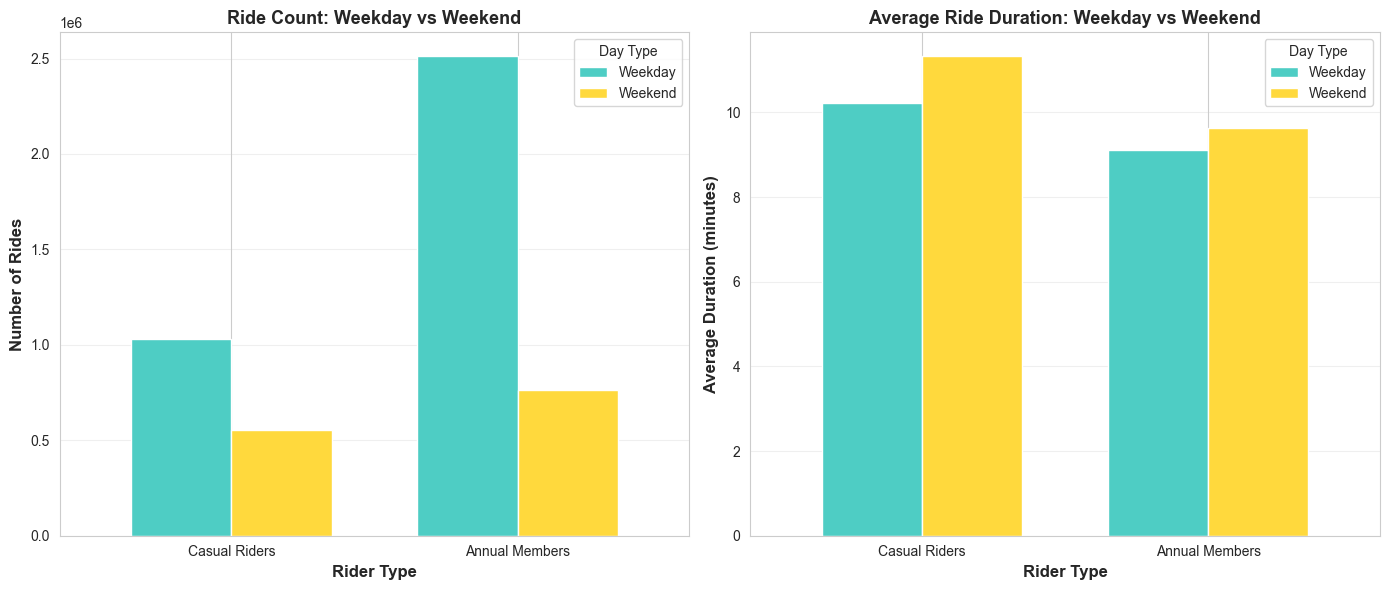

Chart saved: 06_weekday_weekend_comparison.png


In [ ]:
# Weekday vs Weekend comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Ride counts
daytype_counts = df.groupby(['member_casual', 'day_type']).size().unstack()
daytype_counts.plot(kind='bar', ax=ax1, color=['#4ECDC4', '#FFD93D'], width=0.7)

ax1.set_xlabel('Rider Type', fontsize=12, weight='bold')
ax1.set_ylabel('Number of Rides', fontsize=12, weight='bold')
ax1.set_title('Ride Count: Weekday vs Weekend', fontsize=13, weight='bold')
ax1.set_xticklabels(['Casual Riders', 'Annual Members'], rotation=0)
ax1.legend(title='Day Type', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Chart 2: Average duration
daytype_duration = df.groupby(['member_casual', 'day_type'])['ride_length'].mean().unstack()
daytype_duration.plot(kind='bar', ax=ax2, color=['#4ECDC4', '#FFD93D'], width=0.7)

ax2.set_xlabel('Rider Type', fontsize=12, weight='bold')
ax2.set_ylabel('Average Duration (minutes)', fontsize=12, weight='bold')
ax2.set_title('Average Ride Duration: Weekday vs Weekend', fontsize=13, weight='bold')
ax2.set_xticklabels(['Casual Riders', 'Annual Members'], rotation=0)
ax2.legend(title='Day Type', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/06_weekday_weekend_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: 06_weekday_weekend_comparison.png")

---

## Visualization 7: Bike Type Preferences

I'll show which types of bikes each group prefers to use.

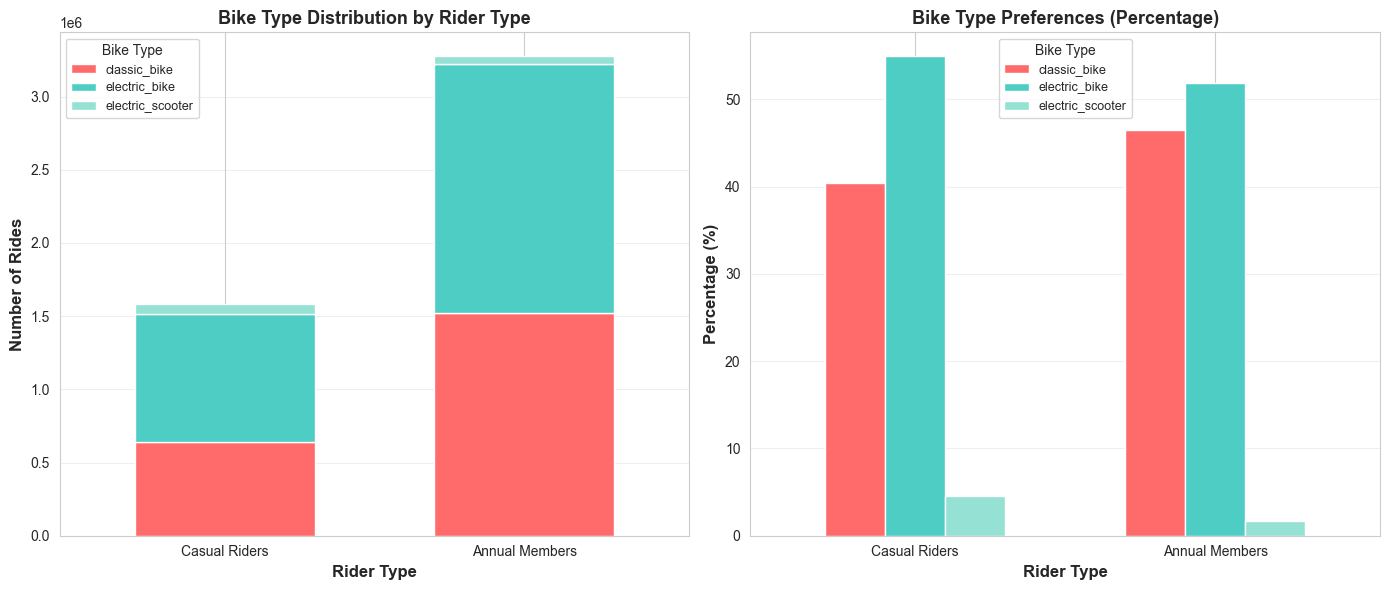

Chart saved: 07_bike_type_preferences.png


In [ ]:
# Bike type preferences
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Stacked bar chart
bike_counts = df.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
bike_counts.plot(kind='bar', stacked=True, ax=ax1, 
                 color=['#FF6B6B', '#4ECDC4', '#95E1D3'], width=0.6)

ax1.set_xlabel('Rider Type', fontsize=12, weight='bold')
ax1.set_ylabel('Number of Rides', fontsize=12, weight='bold')
ax1.set_title('Bike Type Distribution by Rider Type', fontsize=13, weight='bold')
ax1.set_xticklabels(['Casual Riders', 'Annual Members'], rotation=0)
ax1.legend(title='Bike Type', fontsize=9)
ax1.grid(axis='y', alpha=0.3)

# Chart 2: Percentage comparison
bike_pct = df.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
bike_pct = (bike_pct.div(bike_pct.sum(axis=1), axis=0) * 100)

bike_pct.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#95E1D3'], width=0.6)

ax2.set_xlabel('Rider Type', fontsize=12, weight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=12, weight='bold')
ax2.set_title('Bike Type Preferences (Percentage)', fontsize=13, weight='bold')
ax2.set_xticklabels(['Casual Riders', 'Annual Members'], rotation=0)
ax2.legend(title='Bike Type', fontsize=9)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/07_bike_type_preferences.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: 07_bike_type_preferences.png")